# CREDIT CARD TRANSACTIONS FRAUD DETECTION USING UNSUPERVISED DENSITY BASED SPATIAL CLUSTERING OF APPLICATION WITH NOISE (DBSCAN) CLUSTERING ALGORITHM

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Importing Python Libraries

In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from collections import Counter

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score, homogeneity_score, confusion_matrix

from itertools import product

print("Python Libraries Import Completed")

Python Libraries Import Completed


## 2. Data Import and Loading

In [3]:
# Importing the Raw Data from the Local Directory
#raw_data = pd.read_csv("/Users/vidhyalakshmiparthasarathy/.CMVolumes/Google-Drive-pbvidhya/~~~VP_Data_Science/DS_Real_Time_Projects/Credit_Card_Fraud_Detection_Using_UnSupervised_DBSCAN_Clustering/data/credit_card_transactions.csv")

# Importing the Raw Data from the Google Drive Folder
raw_data = pd.read_csv("/content/drive/MyDrive/~~~VP_Data_Science/DS_Real_Time_Projects/Credit_Card_Fraud_Detection_Using_UnSupervised_DBSCAN_Clustering/data/credit_card_transactions.csv")

print("Data Import Completed")

Data Import Completed


## 3. Exploratory Data Analysis (EDA)

In [4]:
# Displaying the Shape of the Raw Data

raw_data.shape

(284807, 31)

In [5]:
# Displaying the First 5 Data Instances of the Raw Data

raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Displaying the Last 5 Data Instances of the Raw Data

raw_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
# Displaying the Attributes/Columns in the Raw Data

raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### As we can see from the above results; the dataset is applied with PCA to reduce the dimensions to 31 columns. PCA is not applied to the attributes namely "Time" and "Amount".

In [8]:
# Displaying the Data Types of the Attributes/Columns in the Raw Data

raw_data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
# Displaying the Descriptive Statistics of all the Attributes/Columns in the Raw Data

raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


### 3.1 Identifying the Missing Values

In [10]:
# Displaying the Missing Values in the Raw Data

missing_values = raw_data.isna().sum()
missing_values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### As we can see from the above results; there are no missing values in the dataset. Hence no data cleaning steps are required for this dataset.

## 4. Data Preparation, Pre-processing and Scaling

### 4.1 Dropping the Output Class Column from the Raw Data for Scaling the Input Features Only

In [11]:
# Dropping the Output Class Column from the Raw Data for Scaling the Input Features Only
raw_data_input = raw_data.drop('Class', axis=1)

# Displaying the Raw Data Input DataFrame
raw_data_input

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [12]:
# Ground-Truth Labels DataFrame

ground_truth_labels = raw_data['Class']

# Displaying the Raw Data Ground-Truth Labels DataFrame
ground_truth_labels

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

### 4.2 Scaling the Raw Data

In [13]:
# Initialsing an Instance/Object of Standard Scaler Function
scaler = StandardScaler()

# Scaling the Raw Data to represent it between -1 and +1
raw_data_scaled = scaler.fit_transform(raw_data_input)

# Displaying the Scaled Raw Data
raw_data_scaled

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

### 4.3 Normalising the Scaled Raw Data

In [14]:
# Normalising the Scaled Raw Data so that the data approximately follows a Gaussian Distribution
raw_data_normalised = normalize(raw_data_scaled)

# Transforming the Normalised Data Numpy Array to a Pandas DataFrame
raw_data_normalised_df = pd.DataFrame(raw_data_normalised)

# Displaying the Normalised Raw DataFrame
raw_data_normalised_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,-0.530160,-0.184345,-0.011703,0.444178,0.258462,-0.065087,0.092158,0.051428,0.021943,0.087926,0.022142,-0.143496,-0.164178,-0.264498,-0.086195,0.425920,-0.142547,0.065020,0.008170,0.131780,0.086595,-0.006618,0.101661,-0.046976,0.029343,0.065477,-0.104135,0.087863,-0.016936,0.065046
1,-0.606033,0.184700,0.048923,0.033327,0.096076,0.013199,-0.018765,-0.019335,0.021628,-0.070570,-0.046547,0.479586,0.323595,0.149163,-0.045525,0.210763,0.160702,-0.041029,-0.066402,-0.054359,-0.027200,-0.093300,-0.267134,0.049234,-0.170323,0.097342,0.079244,-0.006755,0.013540,-0.103953
2,-0.295212,-0.102541,-0.120000,0.172918,0.039661,-0.053906,0.199826,0.094597,0.030662,-0.203851,0.028197,0.090465,0.009779,0.106563,-0.025597,0.378952,-0.487678,0.193234,-0.021409,-0.410839,0.100689,0.049922,0.157229,0.215332,-0.168279,-0.092936,-0.042650,-0.020277,-0.026766,0.171619
3,-0.397555,-0.098231,-0.022335,0.235462,-0.121408,-0.001487,0.186406,0.038245,0.062925,-0.251389,-0.010049,-0.044183,0.035517,0.101585,-0.059808,-0.137360,-0.240794,-0.160380,0.466996,-0.301508,-0.053733,-0.029359,0.001447,-0.060687,-0.386496,0.247287,-0.091638,0.030942,0.037074,0.027983
4,-0.496072,-0.146925,0.132070,0.253786,0.070727,-0.073301,0.017889,0.119090,-0.056280,0.184940,0.171845,-0.200300,0.133830,0.335986,-0.290216,0.047537,-0.128011,-0.069342,-0.011322,0.245245,0.131672,-0.003190,0.273315,-0.054693,0.057955,-0.098194,0.258805,0.135071,0.161954,-0.018238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.097834,-0.361432,0.363425,-0.386482,-0.086972,-0.231583,-0.116589,-0.236887,0.364455,0.103830,0.238382,-0.092999,0.161720,-0.041264,0.287604,-0.060180,0.075319,0.139726,0.036300,-0.049987,0.114067,0.017316,0.009185,0.096800,-0.050111,0.164235,0.030895,0.139303,0.148696,-0.020864
284803,0.330943,-0.075406,-0.006723,0.270515,-0.105141,0.126786,0.160124,0.003964,0.049761,0.107287,-0.180652,-0.029657,0.184732,0.246002,-0.141956,0.256520,-0.163718,-0.006097,-0.293655,-0.382676,0.015586,0.058778,0.256736,0.004023,-0.338192,-0.234554,-0.165203,0.034192,-0.032685,-0.051218
284804,0.337619,0.201510,-0.037512,-0.440681,-0.081010,0.391873,0.467835,-0.049336,0.121960,0.080937,-0.091546,0.082918,0.012989,-0.037951,-0.109524,0.298613,0.033020,0.075896,0.097060,-0.145808,0.000372,0.064957,0.163834,-0.012348,0.217327,0.104823,-0.037254,0.002269,-0.016545,-0.016828
284805,0.279962,-0.020930,0.054774,0.078998,0.083068,-0.046690,0.079822,-0.094574,0.096954,0.060850,-0.062499,-0.323038,-0.164307,-0.178523,0.079974,0.365584,-0.118419,0.102368,0.226609,0.606965,0.028184,0.061571,0.187972,-0.044587,0.034685,-0.186165,0.193289,0.045968,0.053996,-0.053410


## 5. Dimensionality Reduction using Principal Component Analysis (PCA)

### As we have 31 dimensions/features; we need to reduce the total number of dimensions using PCA to represent and visualise the clusters in 2-dimensional format

In [15]:
# PCA Default Parameters Configuration
n_components = 2
copy = True
whiten = False
svd_solver = 'auto'
tol = 0.0
iterated_power = 'auto'
random_state = None

# Initialising an instance/object of the PCA
pca = PCA(n_components=n_components, copy=copy, whiten=whiten, 
          svd_solver=svd_solver, tol=tol, iterated_power=iterated_power, 
          random_state=random_state)

# Fitting and Transforming the Input Features into 2 PCA Components/Dimensions
raw_data_pca = pca.fit_transform(raw_data_normalised_df)

# Displaying the 2 Fitted PCA Conponents Numpy Array
raw_data_pca

array([[ 7.04973273e-01,  2.28692815e-04],
       [ 6.44604521e-01,  3.70372436e-03],
       [ 4.17053914e-01, -4.56063202e-02],
       ...,
       [-4.09605733e-01, -2.51535790e-01],
       [-2.28313457e-01,  5.31094387e-02],
       [-4.84416417e-01,  9.08229130e-02]])

In [16]:
# Transforming the 2 PCA Components Numpy Array to a Pandas DataFrame
raw_data_pca_df = pd.DataFrame(raw_data_pca)

# Setting the Column Names of the PCA Components DataFrame
raw_data_pca_df.columns = ['P1', 'P2']

# Displaying the 2 PCA Conponents DataFrame
raw_data_pca_df

,P1,P2
0,0.704973,0.000229
1,0.644605,0.003704
2,0.417054,-0.045606
3,0.366131,-0.205511
4,0.356820,0.184389
...,...,...
284802,-0.116461,-0.065125
284803,-0.161829,0.133296
284804,-0.409606,-0.251536
284805,-0.228313,0.053109


As we can see from the above results; we have reduced the dimensions of the credit card fraud transactions data from 30 to 2 features for clusters visualisation purposes.

In [17]:
# Extracting the First 40000 Data Instances for DBSCAN Model Fitting Purposes
raw_data_pca_df_samples = raw_data_pca_df[:40000]

raw_data_pca_df_samples

,P1,P2
0,0.704973,0.000229
1,0.644605,0.003704
2,0.417054,-0.045606
3,0.366131,-0.205511
4,0.356820,0.184389
...,...,...
39995,0.199721,0.068394
39996,0.463140,-0.442248
39997,0.118672,-0.193345
39998,0.399070,0.134877


In [18]:
# Extracting the Ground-Truth Lables of the First 40000 Data Instances

ground_truth_labels_samples = ground_truth_labels[:40000]

ground_truth_labels_samples

0        0
1        0
2        0
3        0
4        0
        ..
39995    0
39996    0
39997    0
39998    0
39999    0
Name: Class, Length: 40000, dtype: int64

## 5. DBSCAN Algorithm Implementation

### 5.1 DBSCAN Model Definition and Initiation

In [19]:
# DBSCAN Parameters Initial Configuration

eps = 0.5
min_samples = 10
metric = 'euclidean'
metric_params = None
algorithm = 'auto'
leaf_size = 30
p = None
n_jobs = None

# DBSCAN Model Definition and Initiation
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric, 
                metric_params=metric_params, algorithm=algorithm, 
                leaf_size=leaf_size, p=p, n_jobs=n_jobs)

print("Execution Completed")

Execution Completed


### 5.2 DBSCAN Model Fitting

In [20]:
# DBSCAN Model Fitting

#dbscan.fit(raw_data_pca_df)
dbscan.fit(raw_data_pca_df_samples)

print("Execution Completed")

Execution Completed


### 5.3 DBSCAN Model Outcomes and Performance Metrics

In [21]:
# Extracting the Cluster Labels

pred_labels = dbscan.labels_

pred_labels

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
# Count of the Total Number of Clusters
total_clusters = len(set(pred_labels)) - (1 if -1 in pred_labels else 0)

print("Total Number of Clusters: ", total_clusters)

Total Number of Clusters:  1


In [23]:
# Extracting the Sample Count in Each Cluster

cluster_sample_count = np.bincount(pred_labels[pred_labels >=0])

print("Total Samples in Each Cluster:", cluster_sample_count)

Total Samples in Each Cluster: [40000]


In [25]:
# DBSCAN Default Model - Performance Metrics - Silhouette Coefficient

#silhouette_coef = silhouette_score(raw_data_pca_df_random, pred_labels)

#print("Silhouette Coefficient Score: ", silhouette_coef)

## 6. DBSCAN Algorithm Implementation - Hyper Parameters Tuning

In [26]:
# DBSCAN Hyper Parameters Tuning

eps = [0.2, 0.25, 0.35, 0.4, 0.5, 0.75, 1]       #p1     
min_samples = [5, 10, 15, 20, 25]                #p2
metric = 'euclidean'
metric_params = None
algorithm = 'auto'
leaf_size = 30
p = None
n_jobs = None

# Defining a Scenario ID
scenario_id = 0

# DBSCAN Model Definition and Initiation with Hyper Parameters Tuning
for p1, p2 in product(eps, min_samples):
  dbscan_tuning = DBSCAN(eps=p1, min_samples=p2, metric=metric, 
                         metric_params=metric_params, algorithm=algorithm, 
                         leaf_size=leaf_size, p=p, n_jobs=n_jobs)
  # DBSCAN Model Fitting
  dbscan_tuning.fit(raw_data_pca_df_samples)

  # Extracting the Cluster Labels
  pred_labels_tuning = dbscan.labels_
  
  # Count of the Total Number of Clusters
  total_clusters_tuning = len(set(pred_labels_tuning)) - (1 if -1 in pred_labels_tuning else 0)

  # Extracting the Sample Count in Each Cluster
  cluster_sample_count_tuning = np.bincount(pred_labels_tuning[pred_labels_tuning >=0])

  # DBSCAN Default Model - Performance Metrics - Silhouette Coefficient
  #silhouette_score_tuning = silhouette_score(raw_data_pca_df_samples, pred_labels_tuning)

  # DBSCAN Default Model - Performance Metrics - Homogeneity Score
  homogeneity_score_tuning = homogeneity_score(ground_truth_labels_samples, pred_labels_tuning)

  scenario_id += 1

  print("\nScenario ID: {}, Radius: {}, Minimum Samples Threshold: {}".format(scenario_id, p1, p2))
  print("Predicted Labels are: ", pred_labels_tuning)
  print("Total Number of Clusters are: ", total_clusters_tuning)
  print("Total Samples in Each Cluster are: ", cluster_sample_count_tuning)
  #print("Silhouette Coefficient Score is: ", silhouette_score_tuning)
  print("Homogeneity Coefficient Score is: ", homogeneity_score_tuning)

print("Execution Completed")


Scenario ID: 1, Radius: 0.2, Minimum Samples Threshold: 5
Predicted Labels are:  [0 0 0 ... 0 0 0]
Total Number of Clusters are:  1
Total Samples in Each Cluster are:  [40000]
Homogeneity Coefficient Score is:  0.0

Scenario ID: 2, Radius: 0.2, Minimum Samples Threshold: 10
Predicted Labels are:  [0 0 0 ... 0 0 0]
Total Number of Clusters are:  1
Total Samples in Each Cluster are:  [40000]
Homogeneity Coefficient Score is:  0.0

Scenario ID: 3, Radius: 0.2, Minimum Samples Threshold: 15
Predicted Labels are:  [0 0 0 ... 0 0 0]
Total Number of Clusters are:  1
Total Samples in Each Cluster are:  [40000]
Homogeneity Coefficient Score is:  0.0

Scenario ID: 4, Radius: 0.2, Minimum Samples Threshold: 20
Predicted Labels are:  [0 0 0 ... 0 0 0]
Total Number of Clusters are:  1
Total Samples in Each Cluster are:  [40000]
Homogeneity Coefficient Score is:  0.0

Scenario ID: 5, Radius: 0.2, Minimum Samples Threshold: 25
Predicted Labels are:  [0 0 0 ... 0 0 0]
Total Number of Clusters are:  1

## Results Verification

In [47]:
# Confusion Matrix Between the Actual Labels and the Predicted Labels

cm_dbscan_tuning = confusion_matrix(ground_truth_labels_samples, pred_labels_tuning)

# Printing the Confusion Matrix Array
cm_dbscan_tuning

array([[39896,     0],
       [  104,     0]])

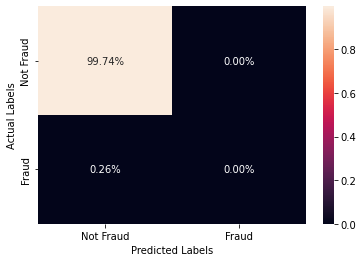

In [52]:
# Visualising the Confusion Matrix using Seaborn Heatmap

# Defining the Heapmap Instance
hmap = sns.heatmap(cm_dbscan_tuning/np.sum(cm_dbscan_tuning), annot=True, fmt='0.2%')

# Setting the X-axis and the Y-axis
hmap.set_xlabel('Predicted Labels')
hmap.set_ylabel('Actual Labels')

# Setting the Labels
hmap.xaxis.set_ticklabels(['Not Fraud', 'Fraud'])
hmap.yaxis.set_ticklabels(['Not Fraud', 'Fraud'])

# Visualising the Heatmap
hmap

As we can see from the above results; there is a total of 0.26% (104 transactions) are fraud transactions which are incorrectly clusterd as Not Fraud. While; all the Non-Fraud transactions are correctly clustered as Not Fraud.